# DATA SCIENCE COMPENSATION ANALYSIS

In [1]:
import mysql.connector
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick

In [270]:
config = configparser.ConfigParser()
config.read('My_SQL.ini')
try:
    mydb = mysql.connector.connect(
        host = config.get("My_SQL", "host"),
        port = config.get("My_SQL", "port"),
        user = config.get("My_SQL", "user"),
        password = config.get("My_SQL", "password"),
        database = config.get("My_SQL", "database"))
    cur = mydb.cursor(buffered=True)
    print("connected")
except:
    print("unable to connect")

connected


### How much do data scientists earn?

In [111]:
df_earning = pd.read_sql_query(
    """
    SELECT yearly_compensation, COUNT(respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info
    WHERE if_student = 'No'
    GROUP BY yearly_compensation
    ORDER BY yearly_compensation
    """, mydb)
df_earning

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4268\2943340546.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_earning = pd.read_sql_query(


,yearly_compensation,Number_of_Respondents
0,None,3900
1,">$1,000,000",23
2,$0-999,1112
3,"$500,000-999,999",48
4,"1,000-1,999",444
5,"10,000-14,999",493
6,"100,000-124,999",404
7,"125,000-149,999",269
8,"15,000-19,999",299
9,"150,000-199,999",342


In [112]:
#deleting the 'None' row
df_earning = df_earning.drop(index=[0])

In [113]:
# updating certian values
df_earning.at[1, "yearly_compensation"] = '> 1,000,000'
df_earning.at[2, "yearly_compensation"] = '0-999'
df_earning.at[3, "yearly_compensation"] = '500,000-999,999'

In [114]:
#Adding the position column to rearrannge the yearly_compensation column
Position_List = [26, 1, 25, 2, 8, 19, 20, 9, 21, 3, 10, 22, 11, 23, 4, 12, 24, 5, 13, 6, 14, 15, 7, 16, 17, 18]
df_earning['Position'] = Position_List
df_earning = df_earning.sort_values(by ='Position', ascending=True)

In [115]:
df_earning =df_earning.set_index('yearly_compensation', inplace=False)
del df_earning['Position']
df_earning

,Number_of_Respondents
yearly_compensation,
0-999,1112
"1,000-1,999",444
"2,000-2,999",271
"3,000-3,999",244
"4,000-4,999",234
"5,000-7,499",391
"7,500-9,999",362
"10,000-14,999",493
"15,000-19,999",299


In [122]:
def my_barchart(my_data, my_kind, my_title, my_spines, 
                my_xlabel, my_ylabel, my_ticks, my_color, my_stacked):
    ax = my_data.plot(kind=my_kind, figsize= (4,6), stacked=my_stacked, color= my_color)
    ax.bar_label(ax.containers[0])
    ax.spines['top'].set_visible(my_spines)
    ax.spines['right'].set_visible(my_spines)
    ax.spines['bottom'].set_visible(my_spines)
    ax.spines['left'].set_visible(my_spines)
    plt.title(f'{my_title}')
    plt.xlabel(f'{my_xlabel}')
    plt.ylabel(f'{my_ylabel}')
    plt.xticks(color = my_ticks)
    plt.yticks(color = my_ticks)
    ax.get_legend().set_visible(False)
    plt.show()

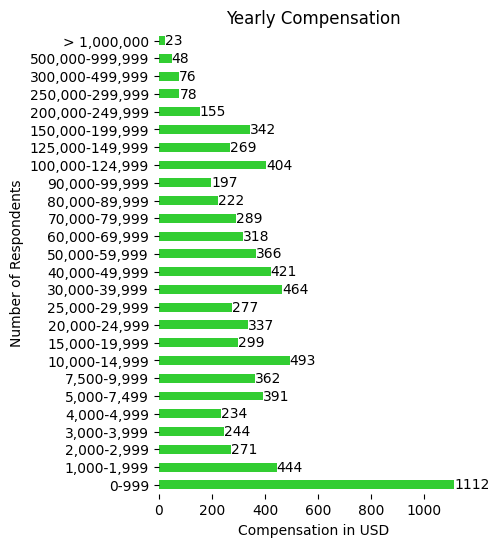

In [123]:
#Creating the barchart
my_barchart(df_earning, 'barh', 'Yearly Compensation', False, 'Compensation in USD', 
            'Number of Respondents', '0', 'limegreen', False)

###### Analyzing compensation  in the US

In [124]:
df_USA = pd.read_sql_query(
    """
    SELECT k.yearly_compensation, COUNT(k.respondent_id) as Number_of_Respondents
    FROM kaggle_respondents_info k, countries c
    WHERE c.country_id = k.country_id AND c.country_name = 'United States of America'
    GROUP BY yearly_compensation
    ORDER BY yearly_compensation
    """, mydb)
df_USA

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4268\3006551720.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_USA = pd.read_sql_query(


,yearly_compensation,Number_of_Respondents
0,None,1486
1,">$1,000,000",8
2,$0-999,56
3,"$500,000-999,999",30
4,"1,000-1,999",3
5,"10,000-14,999",11
6,"100,000-124,999",176
7,"125,000-149,999",185
8,"15,000-19,999",6
9,"150,000-199,999",263


In [125]:
df_USA = df_USA.drop(index=[0])

In [126]:
#### updating certian values
df_USA.at[1, "yearly_compensation"] = '> 1,000,000'
df_USA.at[2, "yearly_compensation"] = '0-999'
df_USA.at[3, "yearly_compensation"] = '500,000-999,999'

In [127]:
Position_List = [26, 1, 25, 2, 8, 19, 20, 9, 21, 3, 10, 22, 11, 23, 4, 12, 24, 5, 13, 6, 14, 15, 7, 16, 17, 18]
df_USA['Position'] = Position_List
df_USA = df_USA.sort_values(by ='Position', ascending=True)

In [128]:
df_USA =df_USA.set_index('yearly_compensation', inplace=False)
del df_USA['Position']
df_USA

,Number_of_Respondents
yearly_compensation,
0-999,56
"1,000-1,999",3
"2,000-2,999",3
"3,000-3,999",3
"4,000-4,999",1
"5,000-7,499",5
"7,500-9,999",8
"10,000-14,999",11
"15,000-19,999",6


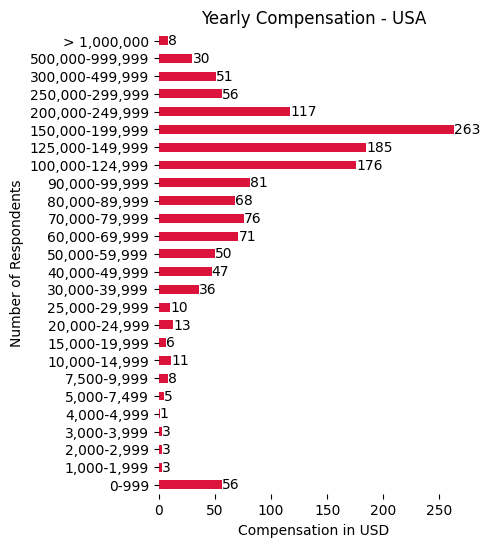

In [132]:
my_barchart(df_USA, 'barh', 'Yearly Compensation - USA', False, 'Compensation in USD', 
            'Number of Respondents', '0', 'crimson', False)

###### Analyzing compensation  in India

In [134]:
df_India = pd.read_sql_query(
    """
    SELECT k.yearly_compensation, COUNT(k.respondent_id) as Number_of_Respondents
    FROM kaggle_respondents_info k, countries c
    WHERE c.country_id = k.country_id AND c.country_name = 'India'
    GROUP BY yearly_compensation
    ORDER BY yearly_compensation
    """, mydb)
df_India

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4268\834337991.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_India = pd.read_sql_query(


,yearly_compensation,Number_of_Respondents
0,None,6464
1,">$1,000,000",6
2,$0-999,450
3,"$500,000-999,999",9
4,"1,000-1,999",159
5,"10,000-14,999",228
6,"100,000-124,999",23
7,"125,000-149,999",14
8,"15,000-19,999",150
9,"150,000-199,999",10


In [135]:
df_India= df_India.drop(index=[0])

In [136]:
#### updating certian values
df_India.at[1, "yearly_compensation"] = '> 1,000,000'
df_India.at[2, "yearly_compensation"] = '0-999'
df_India.at[3, "yearly_compensation"] = '500,000-999,999'

In [138]:
Position_List = [26, 1, 25, 2, 8, 19, 20, 9, 21, 3, 10, 22, 11, 23, 4, 12, 24, 5, 13, 6, 14, 15, 7, 16, 17, 18]
df_India['Position'] = Position_List
df_India = df_India.sort_values(by ='Position', ascending=True)

In [139]:
df_India =df_India.set_index('yearly_compensation', inplace=False)
del df_India['Position']
df_India

,Number_of_Respondents
yearly_compensation,
0-999,450
"1,000-1,999",159
"2,000-2,999",90
"3,000-3,999",110
"4,000-4,999",110
"5,000-7,499",213
"7,500-9,999",194
"10,000-14,999",228
"15,000-19,999",150


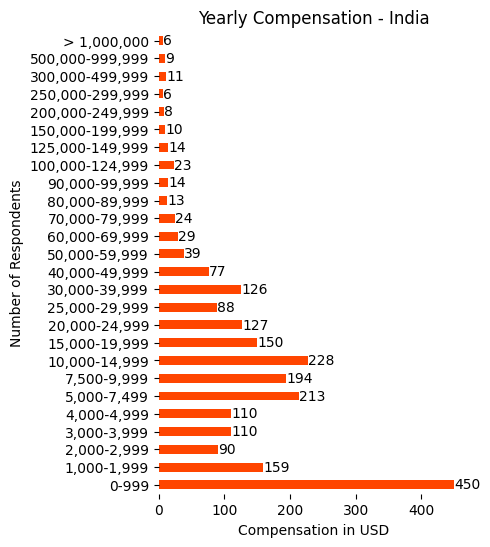

In [141]:
my_barchart(df_India, 'barh', 'Yearly Compensation - India', False, 'Compensation in USD', 
            'Number of Respondents', '0', 'orangered', False)

### Compensation vs Years Written Code

In [142]:
#In Kaggle_Respondents_Info let's add a column to calculate the avarage years written code per respodent
cur.execute("""
SELECT DISTINCT years_written_code
FROM kaggle_respondents_info
""")
results = cur.fetchall()
for l in results:
    print(l)

('< 1 years',)
('5-10 years',)
('3-5 years',)
('1-3 years',)
('10-20 years',)
('20+ years',)
('I have never written code',)
(None,)


In [163]:
cur.execute("""
ALTER TABLE kaggle_respondents_info
ADD COLUMN avarage_years_written_code DEC(5,1)
""")
mydb.commit()

In [168]:
cur.execute("""
UPDATE kaggle_respondents_info
SET avarage_years_written_code = 
CASE
WHEN years_written_code = '< 1 years'
THEN (0+1)/2 
WHEN years_written_code = '5-10 years'
THEN (5+10)/2
WHEN years_written_code = '3-5 years'
THEN (3+5)/2
WHEN years_written_code = '1-3 years'
THEN (1+3)/2
WHEN years_written_code = '10-20 years'
THEN (10+20)/2
WHEN years_written_code = '20+ years'
THEN (20+40)/2
ELSE 0
END
""")
mydb.commit()

In [169]:
df = pd.read_sql_query("SELECT * FROM kaggle_respondents_info ORDER BY respondent_id", mydb)
df.head(10)

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4268\254834386.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM kaggle_respondents_info ORDER BY respondent_id", mydb)


,respondent_id,age,gender,country_id,if_student,education_level_id,years_written_code,role_id,industry_id,yearly_compensation,avarage_years_written_code
0,1,25-29,Woman,43,Yes,2.0,< 1 years,NaN,NaN,None,0.5
1,2,30-34,Woman,22,No,3.0,5-10 years,16.0,2.0,$0-999,7.5
2,3,22-24,Man,22,No,2.0,3-5 years,7.0,2.0,$0-999,4.0
3,4,30-34,Woman,36,Yes,5.0,5-10 years,NaN,NaN,None,7.5
4,5,30-34,Man,22,No,3.0,5-10 years,16.0,2.0,"15,000-19,999",7.5
5,6,22-24,Woman,32,Yes,5.0,< 1 years,NaN,NaN,None,0.5
6,7,25-29,Man,23,No,8.0,< 1 years,2.0,NaN,None,0.5
7,8,45-49,Woman,57,Yes,5.0,< 1 years,NaN,NaN,None,0.5
8,9,18-21,Man,43,Yes,6.0,1-3 years,NaN,NaN,None,2.0
9,10,18-21,Woman,22,Yes,2.0,1-3 years,NaN,NaN,None,2.0


In [240]:
df_cy = pd.read_sql_query(
    """
    SELECT yearly_compensation, AVG(avarage_years_written_code) AS Average_Coding_Years
    FROM kaggle_respondents_info
    WHERE if_student = 'No'
    GROUP BY yearly_compensation
    ORDER BY yearly_compensation
    """, mydb)
df_cy

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4268\2140186912.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cy = pd.read_sql_query(


,yearly_compensation,Average_Coding_Years
0,None,5.29346
1,">$1,000,000",10.69565
2,$0-999,4.39883
3,"$500,000-999,999",15.28125
4,"1,000-1,999",4.73986
5,"10,000-14,999",5.97870
6,"100,000-124,999",12.88614
7,"125,000-149,999",13.42193
8,"15,000-19,999",6.78595
9,"150,000-199,999",15.47807


In [241]:
df_cy= df_cy.drop(index=[0])

In [242]:
#### updating certian values
df_cy.at[1, "yearly_compensation"] = '> 1,000,000'
df_cy.at[2, "yearly_compensation"] = '0-999'
df_cy.at[3, "yearly_compensation"] = '500,000-999,999'

In [243]:
Position_List = [26, 1, 25, 2, 8, 19, 20, 9, 21, 3, 10, 22, 11, 23, 4, 12, 24, 5, 13, 6, 14, 15, 7, 16, 17, 18]
df_cy['Position'] = Position_List
df_cy = df_cy.sort_values(by ='Position', ascending=True)

In [244]:
df_cy =df_cy.set_index('yearly_compensation', inplace=False)
del df_cy['Position']

In [245]:
def my_linechart(my_data, my_title, my_spines, 
                my_xlabel, my_ylabel, my_ticks, my_color):
    ax = my_data.plot.line(figsize= (10,4), color= my_color)
    ax.spines['top'].set_visible(my_spines)
    ax.spines['right'].set_visible(my_spines)
    ax.spines['bottom'].set_visible(my_spines)
    ax.spines['left'].set_visible(my_spines)
    plt.title(f'{my_title}')
    plt.xlabel(f'{my_xlabel}')
    plt.ylabel(f'{my_ylabel}')
    plt.xticks(color = my_ticks)
    plt.yticks(color = my_ticks)
    ax.get_legend().set_visible(False)
    plt.show()

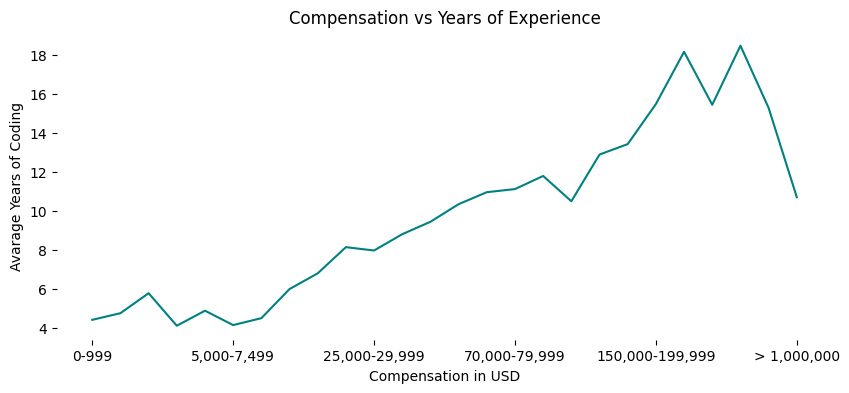

In [246]:
my_linechart(df_cy, 'Compensation vs Years of Experience', False, 'Compensation in USD', 'Avarage Years of Coding', '0', 'teal')

In [247]:
df_us = pd.read_sql_query(
    """
    SELECT k.yearly_compensation, AVG(k.avarage_years_written_code) AS Average_Coding_Years
    FROM kaggle_respondents_info k, countries c
    WHERE c.country_id = k.country_id AND k.if_student = 'No' AND c.country_name = 'United States of America'
    GROUP BY yearly_compensation
    ORDER BY yearly_compensation
    """, mydb)
df_us

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4268\1343664741.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_us = pd.read_sql_query(


,yearly_compensation,Average_Coding_Years
0,None,8.78559
1,">$1,000,000",9.93750
2,$0-999,13.93750
3,"$500,000-999,999",18.15000
4,"1,000-1,999",10.83333
5,"10,000-14,999",7.72727
6,"100,000-124,999",11.54545
7,"125,000-149,999",12.50541
8,"15,000-19,999",20.08333
9,"150,000-199,999",15.15019


In [248]:
df_us= df_us.drop(index=[0])

In [249]:
#### updating certian values
df_us.at[1, "yearly_compensation"] = '> 1,000,000'
df_us.at[2, "yearly_compensation"] = '0-999'
df_us.at[3, "yearly_compensation"] = '500,000-999,999'

In [250]:
Position_List = [26, 1, 25, 2, 8, 19, 20, 9, 21, 3, 10, 22, 11, 23, 4, 12, 24, 5, 13, 6, 14, 15, 7, 16, 17, 18]
df_us['Position'] = Position_List
df_us = df_us.sort_values(by ='Position', ascending=True)

In [251]:
df_us =df_us.set_index('yearly_compensation', inplace=False)
del df_us['Position']

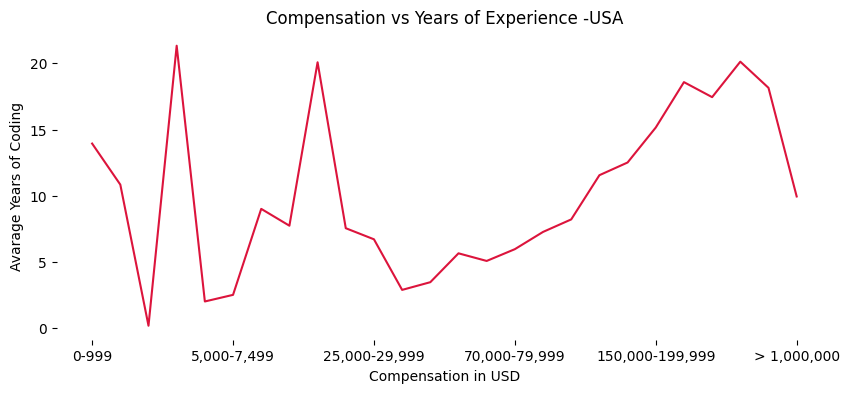

In [252]:
my_linechart(df_us, 'Compensation vs Years of Experience -USA', False, 
             'Compensation in USD', 'Avarage Years of Coding', '0', 'crimson')

In [253]:
df_cy.rename(columns = {'Average_Coding_Years':'World'}, inplace = True)
df_us.rename(columns = {'Average_Coding_Years':'USA'}, inplace = True)
df_cy.reset_index(inplace = True)
df_cy.reset_index(inplace = True)

In [254]:
#joining the tow dataframes
df_c = pd.merge(df_cy, df_us, how='inner', on='yearly_compensation')
df_c.set_index("yearly_compensation", inplace= True)

In [258]:
del df_c['index']
df_c

,World,USA
yearly_compensation,,
0-999,4.39883,13.93750
"1,000-1,999",4.73986,10.83333
"2,000-2,999",5.76568,0.16667
"3,000-3,999",4.09631,21.33333
"4,000-4,999",4.86752,2.00000
"5,000-7,499",4.12916,2.50000
"7,500-9,999",4.48343,9.00000
"10,000-14,999",5.97870,7.72727
"15,000-19,999",6.78595,20.08333


Text(0, 0.5, 'Average Years of Coding')

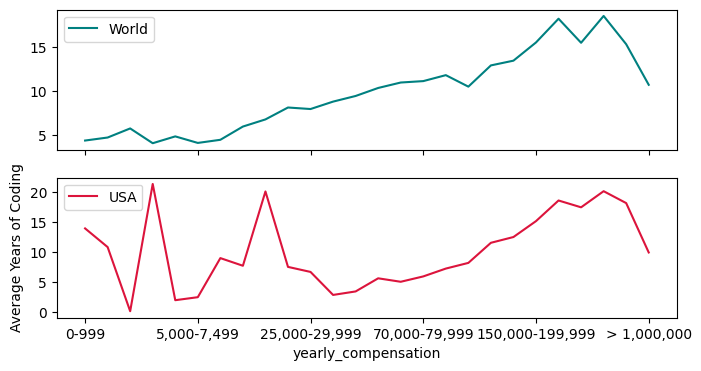

In [268]:
axes = df_c.plot.line(
    subplots=True, figsize= (8,4), color={"World": "teal", "USA": "crimson"})
plt.ylabel('Average Years of Coding')

In [269]:
mydb.close()
cur.close()

True